## *According to the World Health Organization (WHO) stroke is the 2nd leading* 
## *cause of death globally, responsible for approximately 11% of total deaths.*

# **Import Libraries**

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# **Load the dataset**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
df = pd.read_csv("DATA/healthcare-dataset-stroke-data.csv")

In [3]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

## *Take a look at the Dataset*

In [4]:
df_explore = df.copy()

In [5]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df_explore.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df_explore.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df_explore.describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00      1.00

In [9]:
df_explore.describe(include="O") #include object

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

# **Handling Null Values**

## **Missing Values**

In [10]:
df_miss = df_explore.copy()

In [11]:
df_miss.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
## persantage of null values

df_miss.isnull().sum() * 100 / len(df_miss)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

## **Filling Null Values**

In [13]:
df_Fill_Null = df_miss.copy()

<Axes: >

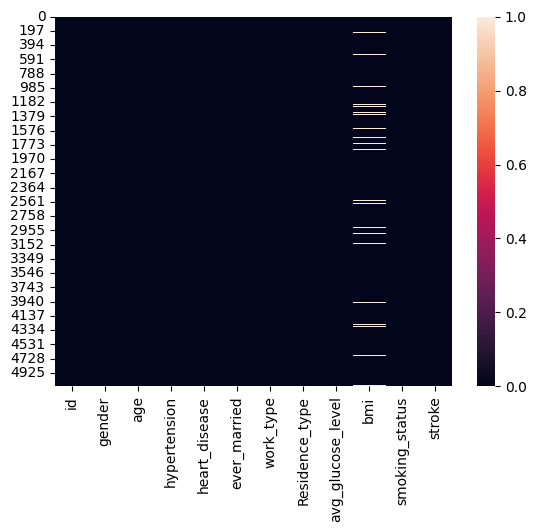

In [14]:
sns.heatmap(df_Fill_Null.isnull())

In [15]:
df_Fill_Null["bmi"].interpolate(method= "linear", inplace = True)

In [16]:
df_Fill_Null.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

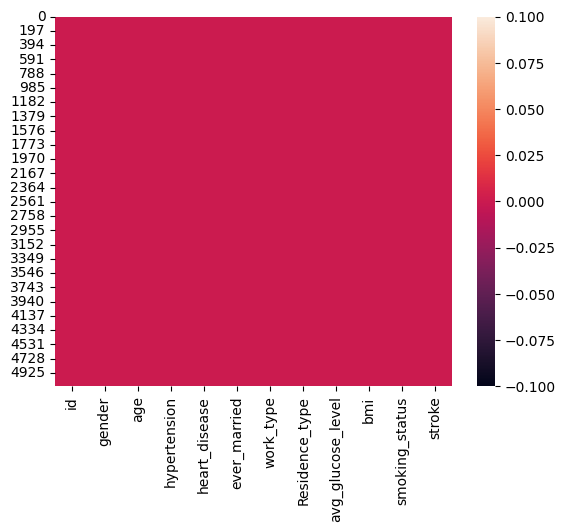

In [17]:
sns.heatmap(df_Fill_Null.isnull())

In [18]:
len(df_Fill_Null)

5110

In [19]:
len(df)

5110

### **Length of ( df = df_Fill_Null ) and also all Null Values are Filled**

# **Data Visualization**

In [20]:
df_viz = df.copy()

## **1. What is the distribution of stroke occurrences?**

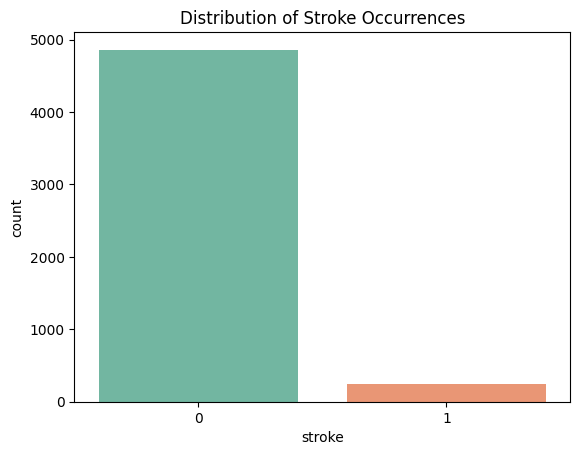

In [21]:
sns.countplot(x='stroke', data=df_viz, palette='Set2')
plt.title('Distribution of Stroke Occurrences')
plt.show()

## **2. How does age distribution differ between those who had a stroke and those who didn’t?**

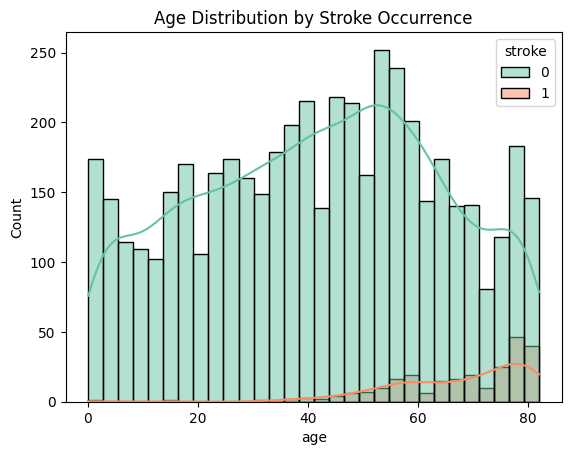

In [22]:
sns.histplot(data=df_viz, x='age', hue='stroke', kde=True, bins=30, palette='Set2')
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

## **3. Is there a gender difference in stroke occurrence?**

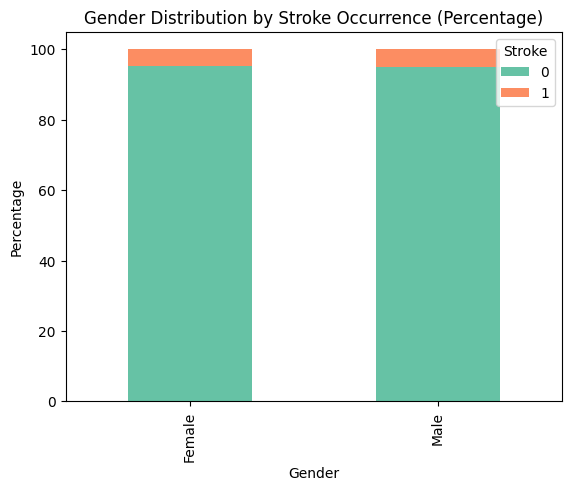

In [23]:
df_filtered = df_viz[df_viz['gender'].isin(['Male', 'Female'])]

gender_stroke_counts = df_filtered.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_percent = gender_stroke_counts.div(gender_stroke_counts.sum(axis=1), axis=0) * 100

gender_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

# Add plot details
plt.title('Gender Distribution by Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Stroke', loc='upper right')
plt.show()

## **4. What is the relationship between hypertension and stroke?**

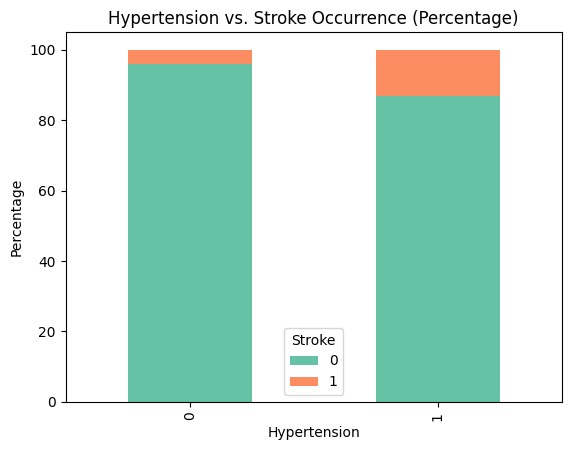

In [24]:
hypertension_stroke_counts = df_viz.groupby(['hypertension', 'stroke']).size().unstack()

hypertension_totals = hypertension_stroke_counts.sum(axis=1)
hypertension_stroke_percent = hypertension_stroke_counts.div(hypertension_totals, axis=0) * 100

hypertension_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

# Add details
plt.title('Hypertension vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Hypertension')
plt.legend(title='Stroke')
plt.show()

## **5. How does heart disease relate to stroke occurrence?**

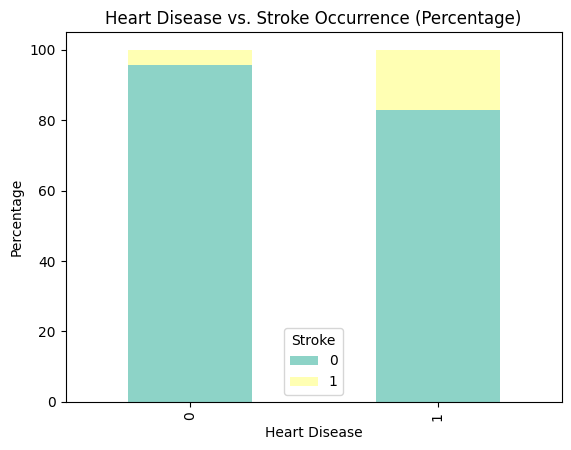

In [25]:
heart_disease_stroke_counts = df_viz.groupby(['heart_disease', 'stroke']).size().unstack()
heart_disease_totals = heart_disease_stroke_counts.sum(axis=1)
heart_disease_stroke_percent = heart_disease_stroke_counts.div(heart_disease_totals, axis=0) * 100

heart_disease_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set3'))
plt.title('Heart Disease vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Heart Disease')
plt.legend(title='Stroke')
plt.show()

## **6. What is the distribution of BMI values for those who had a stroke vs. those who didn’t?**

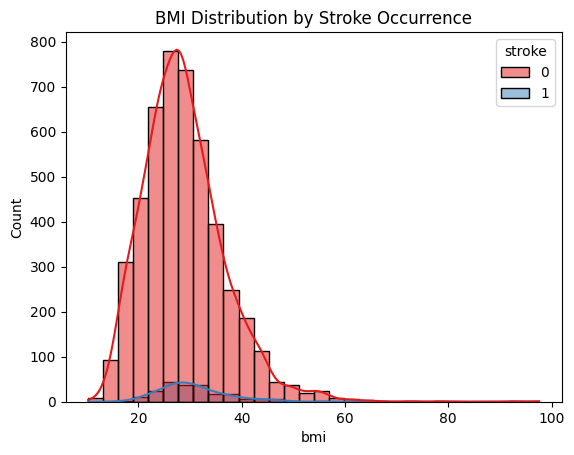

In [26]:
sns.histplot(data=df_viz, x='bmi', hue='stroke', kde=True, bins=30, palette='Set1')
plt.title('BMI Distribution by Stroke Occurrence')
plt.show()

## **7. Is there a significant difference in average glucose levels between stroke and non-stroke patients?**


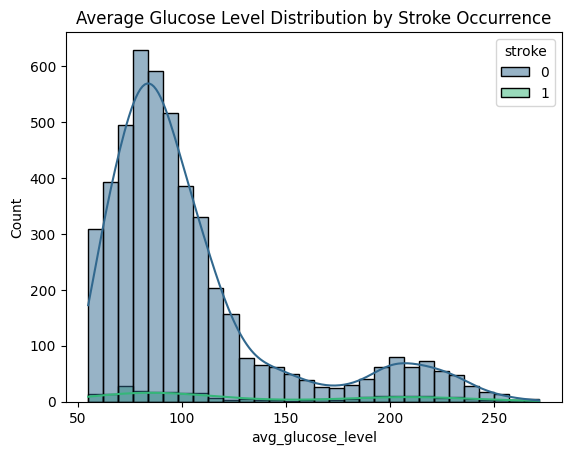

In [27]:
sns.histplot(data=df_viz, x='avg_glucose_level', hue='stroke', kde=True, bins=30, palette='viridis')
plt.title('Average Glucose Level Distribution by Stroke Occurrence')
plt.show()

## **8. How does marital status correlate with stroke occurrences?**

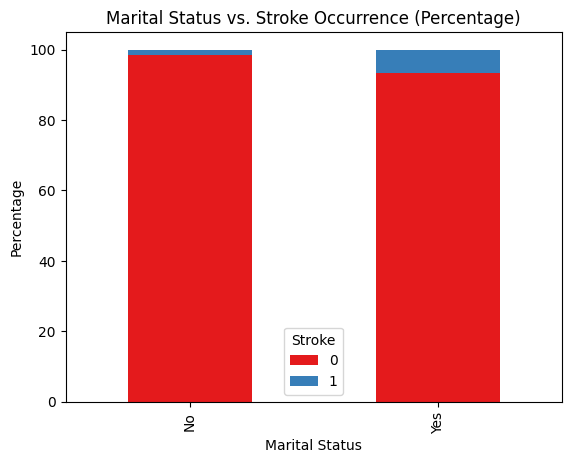

In [28]:
marital_stroke_counts = df_viz.groupby(['ever_married', 'stroke']).size().unstack()
marital_totals = marital_stroke_counts.sum(axis=1)
marital_stroke_percent = marital_stroke_counts.div(marital_totals, axis=0) * 100

marital_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set1'))

#details
plt.title('Marital Status vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Marital Status')
plt.legend(title='Stroke')
plt.show()

## **9. What is the stroke occurrence rate among different work types?**

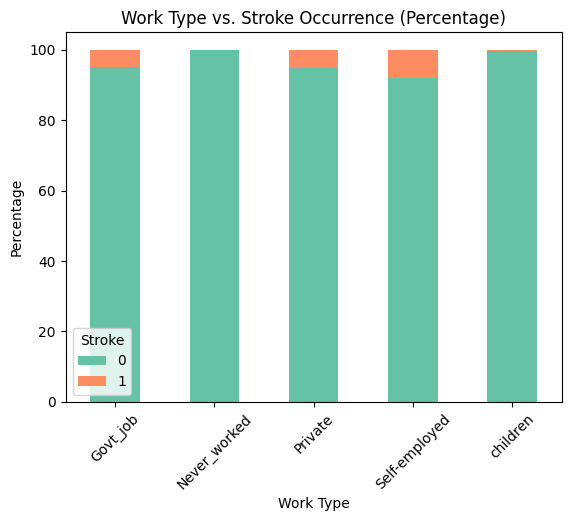

In [29]:
work_type_stroke_counts = df_viz.groupby(['work_type', 'stroke']).size().unstack()
work_type_totals = work_type_stroke_counts.sum(axis=1)
work_type_stroke_percent = work_type_stroke_counts.div(work_type_totals, axis=0) * 100

work_type_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

plt.title('Work Type vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

## **10. Residence type vs. Stroke Occurrence (percentage bar chart)**

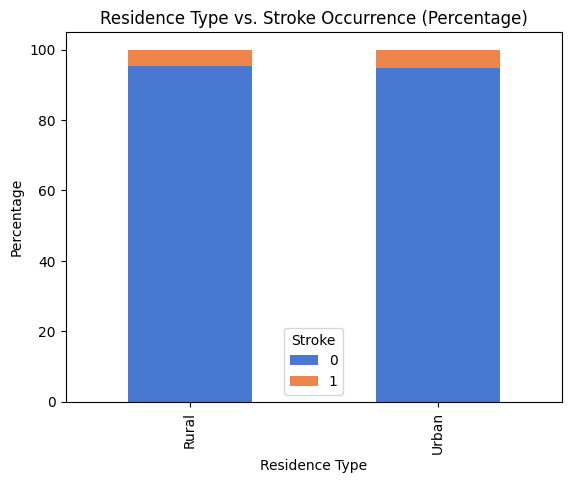

In [30]:
residence_stroke_counts = df_viz.groupby(['Residence_type', 'stroke']).size().unstack()
residence_totals = residence_stroke_counts.sum(axis=1)
residence_stroke_percent = residence_stroke_counts.div(residence_totals, axis=0) * 100

residence_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('muted'))

plt.title('Residence Type vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Residence Type')
plt.legend(title='Stroke')
plt.show()

## **11. What is the age distribution across different work types?**

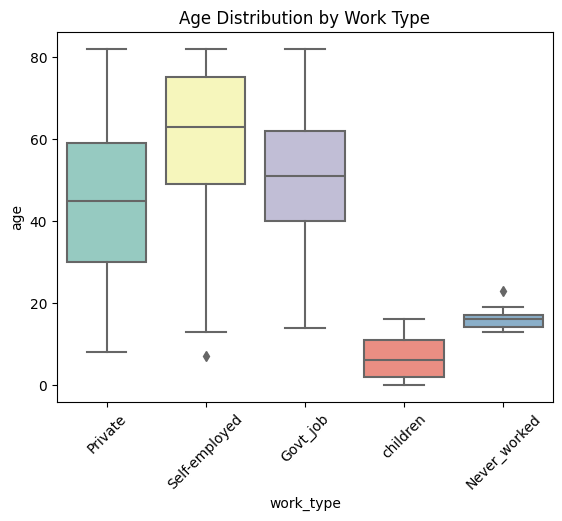

In [31]:
sns.boxplot(x='work_type', y='age', data=df_viz, palette='Set3')
plt.title('Age Distribution by Work Type')
plt.xticks(rotation=45)
plt.show()

## **12. What is the distribution of average glucose levels across different work types?**

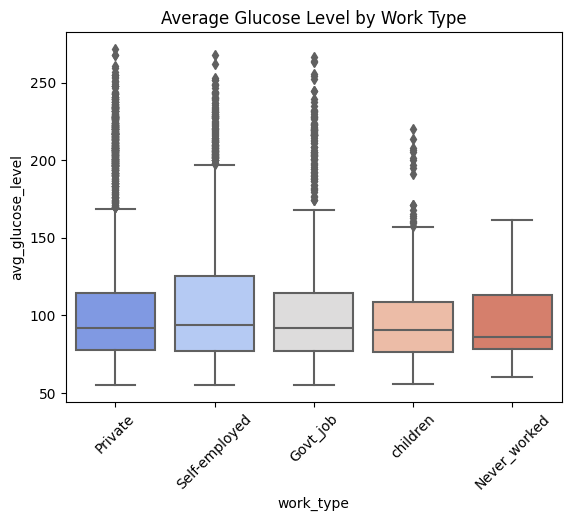

In [32]:
sns.boxplot(x='work_type', y='avg_glucose_level', data=df_viz, palette='coolwarm')
plt.title('Average Glucose Level by Work Type')
plt.xticks(rotation=45)
plt.show()

## **13. How is BMI distributed across different work types?**

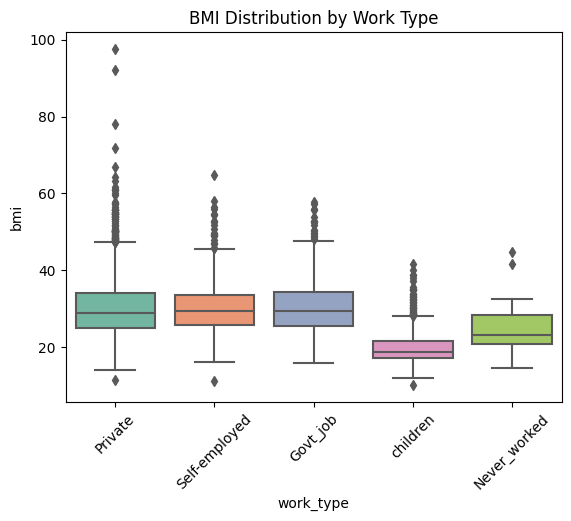

In [33]:
sns.boxplot(x='work_type', y='bmi', data=df_viz, palette='Set2')
plt.title('BMI Distribution by Work Type')
plt.xticks(rotation=45)
plt.show()

## **14. Smoking status vs. Stroke Occurrence (percentage bar chart)**

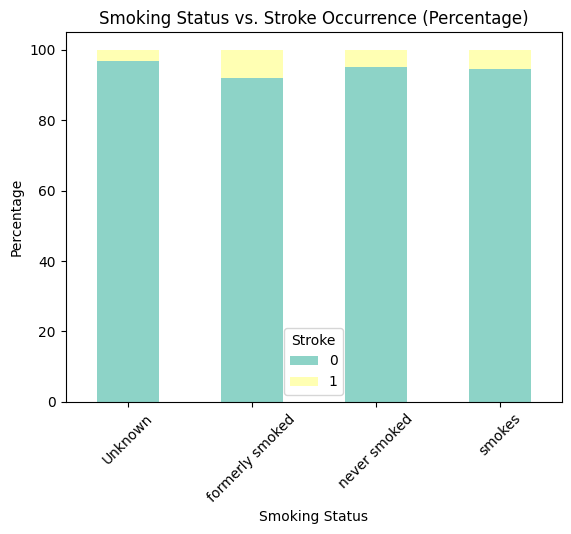

In [34]:
smoking_stroke_counts = df_viz.groupby(['smoking_status', 'stroke']).size().unstack()
smoking_totals = smoking_stroke_counts.sum(axis=1)
smoking_stroke_percent = smoking_stroke_counts.div(smoking_totals, axis=0) * 100

smoking_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set3'))

plt.title('Smoking Status vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Smoking Status')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

## **15. How does age distribution vary across different smoking statuses?**

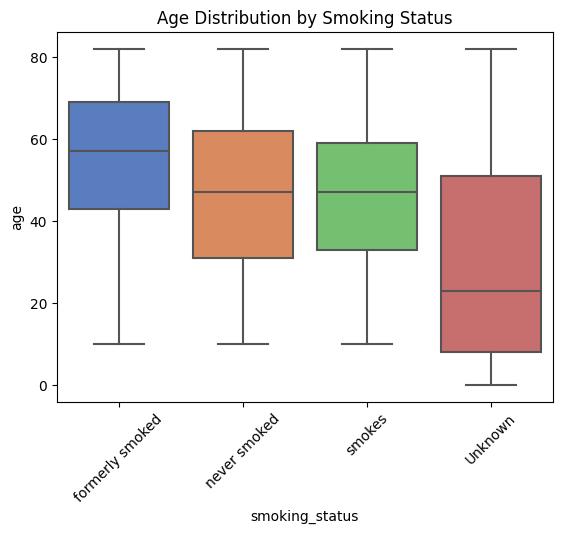

In [35]:
sns.boxplot(x='smoking_status', y='age', data=df_viz, palette='muted')
plt.title('Age Distribution by Smoking Status')
plt.xticks(rotation=45)
plt.show()

## **16. How does BMI vary across different smoking statuses?**

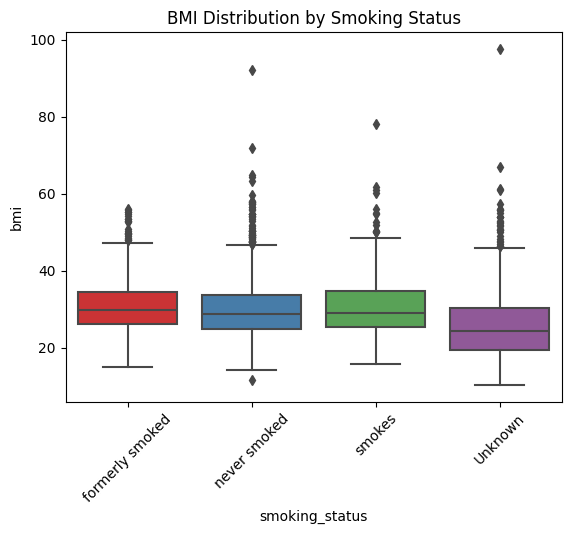

In [36]:
sns.boxplot(x='smoking_status', y='bmi', data=df_viz, palette='Set1')
plt.title('BMI Distribution by Smoking Status')
plt.xticks(rotation=45)
plt.show()

## **17. What is the Average Glucose Level Distribution by Smoking Status?**

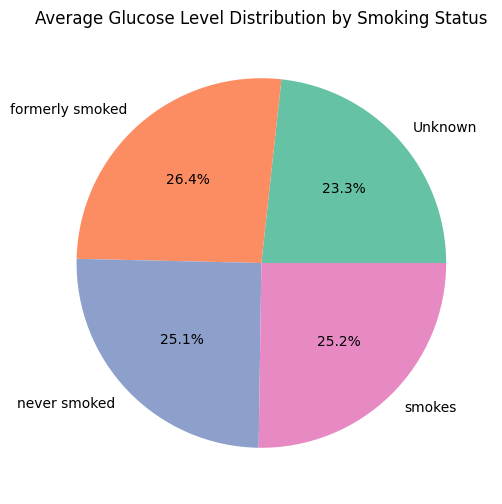

In [37]:
glucose_smoking_means = df_viz.groupby('smoking_status')['avg_glucose_level'].mean()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(glucose_smoking_means, labels=glucose_smoking_means.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Average Glucose Level Distribution by Smoking Status')
plt.show()

## **18. Average Glucose Level Distribution by Gender**

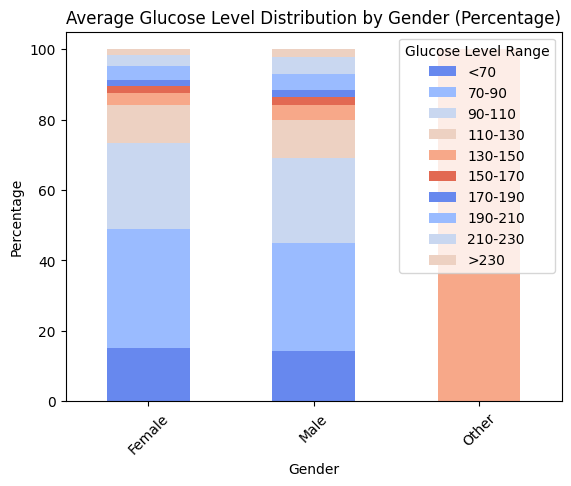

In [38]:
# Bin average glucose levels into ranges
bins = [0, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]
labels = ['<70', '70-90', '90-110', '110-130', '130-150', '150-170', '170-190', '190-210', '210-230', '>230']
df_viz['glucose_binned'] = pd.cut(df_viz['avg_glucose_level'], bins=bins, labels=labels, right=False)

glucose_gender_counts = df_viz.groupby(['gender', 'glucose_binned']).size().unstack().fillna(0)
glucose_gender_percent = glucose_gender_counts.div(glucose_gender_counts.sum(axis=1), axis=0) * 100

glucose_gender_percent.plot(kind='bar', stacked=True, color=sns.color_palette('coolwarm'))
plt.title('Average Glucose Level Distribution by Gender (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.legend(title='Glucose Level Range')
plt.show()

## **19. Average Glucose Level Distribution by Hypertension**

<Figure size 1000x600 with 0 Axes>

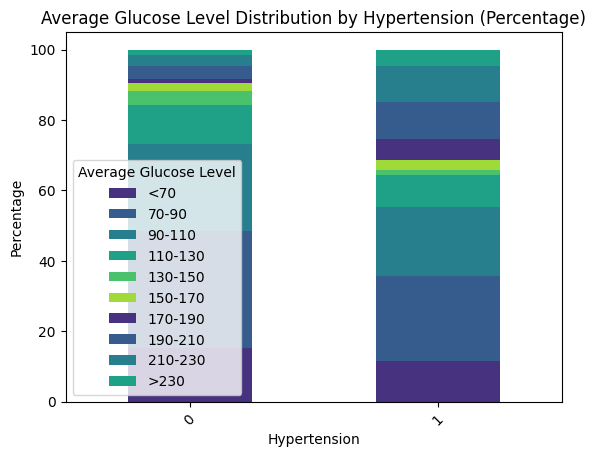

In [39]:
glucose_hypertension_counts = df_viz.groupby(['hypertension', 'glucose_binned']).size().unstack().fillna(0)
glucose_hypertension_percent = glucose_hypertension_counts.div(glucose_hypertension_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
glucose_hypertension_percent.plot(kind='bar', stacked=True, color=sns.color_palette('viridis'))
plt.title('Average Glucose Level Distribution by Hypertension (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Hypertension')
plt.xticks(rotation=45)
plt.legend(title='Average Glucose Level')
plt.show()

## **20. Average Glucose Level Distribution by Heart Disease**

<Figure size 1000x600 with 0 Axes>

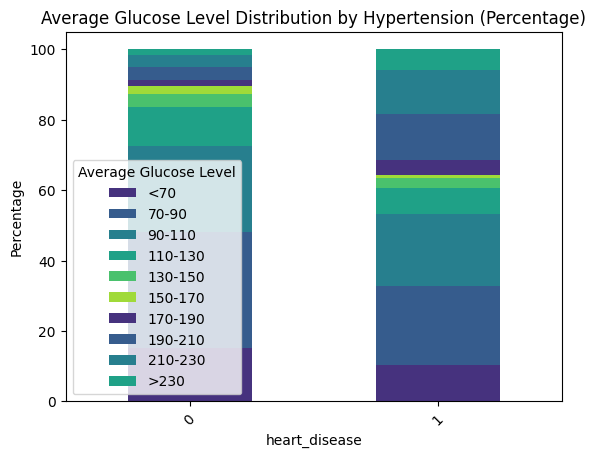

In [40]:
glucose_hypertension_counts = df_viz.groupby(['heart_disease', 'glucose_binned']).size().unstack().fillna(0)
glucose_hypertension_percent = glucose_hypertension_counts.div(glucose_hypertension_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
glucose_hypertension_percent.plot(kind='bar', stacked=True, color=sns.color_palette('viridis'))
plt.title('Average Glucose Level Distribution by Hypertension (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('heart_disease')
plt.xticks(rotation=45)
plt.legend(title='Average Glucose Level')
plt.show()

## **21. BMI Distribution by Gender**

<Figure size 1000x600 with 0 Axes>

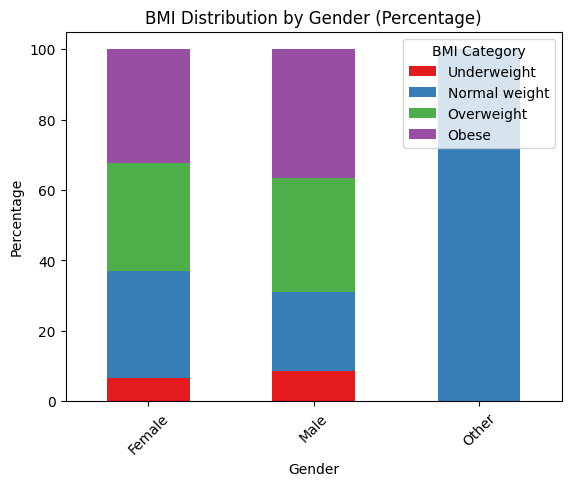

In [41]:
bmi_bins = [0, 18.5, 24.9, 29.9, 40]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df_viz['bmi_binned'] = pd.cut(df_viz['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_gender_counts = df_viz.groupby(['gender', 'bmi_binned']).size().unstack().fillna(0)
bmi_gender_percent = bmi_gender_counts.div(bmi_gender_counts.sum(axis=1), axis=0) * 100

# Plot the data
plt.figure(figsize=(10, 6))
bmi_gender_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set1'))
plt.title('BMI Distribution by Gender (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.legend(title='BMI Category')
plt.show()

## **22. BMI Distribution by Hypertension**

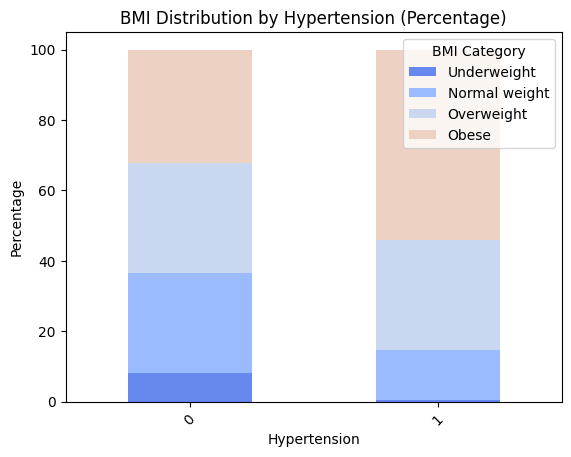

In [42]:
bmi_hypertension_counts = df_viz.groupby(['hypertension', 'bmi_binned']).size().unstack().fillna(0)
bmi_hypertension_percent = bmi_hypertension_counts.div(bmi_hypertension_counts.sum(axis=1), axis=0) * 100

bmi_hypertension_percent.plot(kind='bar', stacked=True, color=sns.color_palette('coolwarm'))
plt.title('BMI Distribution by Hypertension (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Hypertension')
plt.legend(title='BMI Category')
plt.xticks(rotation=45)
plt.show()

## **23. BMI Distribution by Heart Disease**

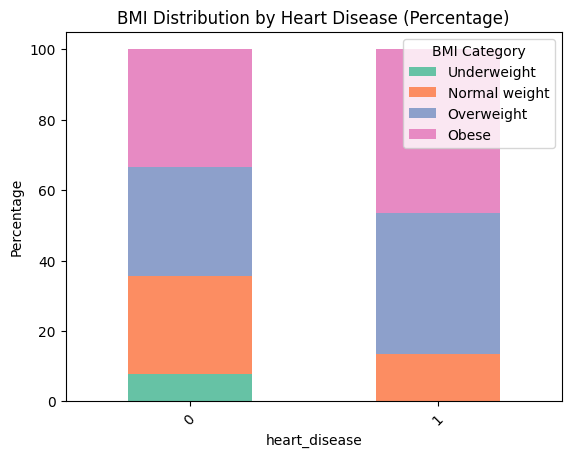

In [43]:
bmi_heart_disease_counts = df_viz.groupby(['heart_disease', 'bmi_binned']).size().unstack().fillna(0)
bmi_heart_disease_percent = bmi_heart_disease_counts.div(bmi_heart_disease_counts.sum(axis=1), axis=0) * 100

bmi_heart_disease_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))
plt.title('BMI Distribution by Heart Disease (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('heart_disease')
plt.legend(title='BMI Category')
plt.xticks(rotation=45)
plt.show()

## **24. Distribution of Age by Marital Status**

In [44]:
df_viz['age_group'] = pd.cut(df_viz['age'], bins=[0, 18, 35, 50, 65, 80, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-80', '81-100'], right = False)


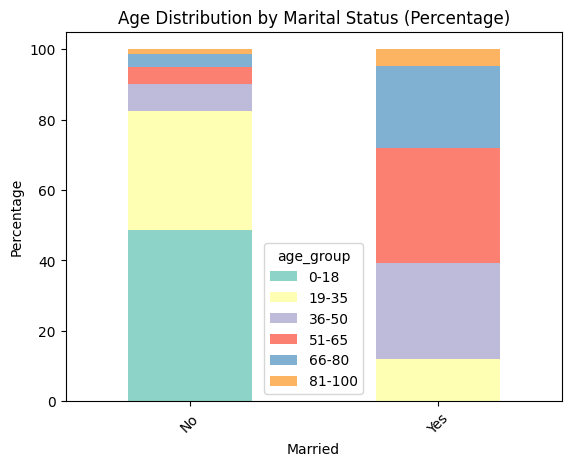

In [45]:
age_marital_counts = df_viz.groupby(['ever_married', 'age_group']).size().unstack().fillna(0)
age_marital_percent = age_marital_counts.div(age_marital_counts.sum(axis=1), axis=0) * 100

age_marital_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set3'))
plt.title('Age Distribution by Marital Status (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Married')
plt.xticks(rotation=45)
plt.show()

## **25. How does the distribution of average glucose levels vary across different age groups?**

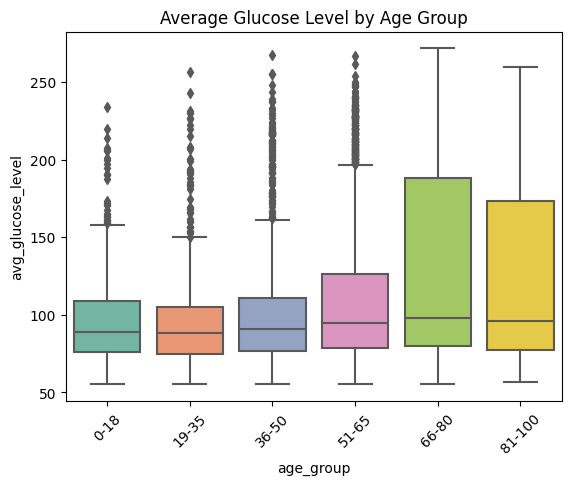

In [46]:
sns.boxplot(x='age_group', y='avg_glucose_level', data=df_viz, palette='Set2')
plt.title('Average Glucose Level by Age Group')
plt.xticks(rotation=45)
plt.show()

## **26. How does the distribution of BMI vary across different age groups?**

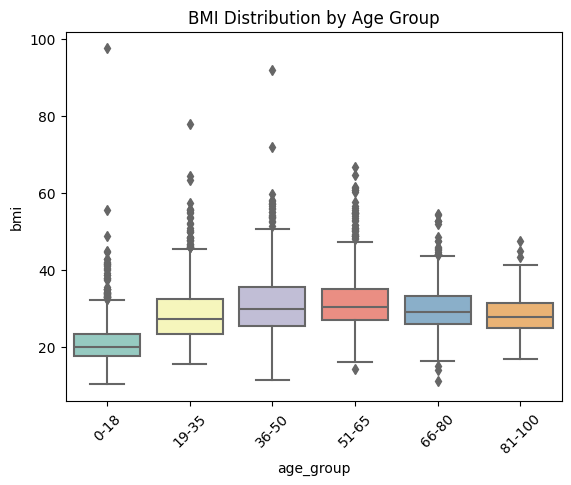

In [47]:
sns.boxplot(x='age_group', y='bmi', data=df_viz, palette='Set3')
plt.title('BMI Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

## **27. How does the distribution of hypertension vary across different age groups?**

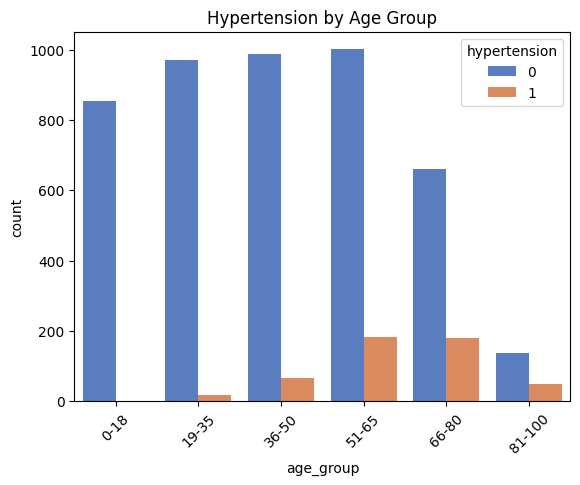

In [48]:
sns.countplot(x='age_group', hue='hypertension', data=df_viz, palette='muted')
plt.title('Hypertension by Age Group')
plt.xticks(rotation=45)
plt.show()

## **28. How does the distribution of heart disease vary across different age groups?**

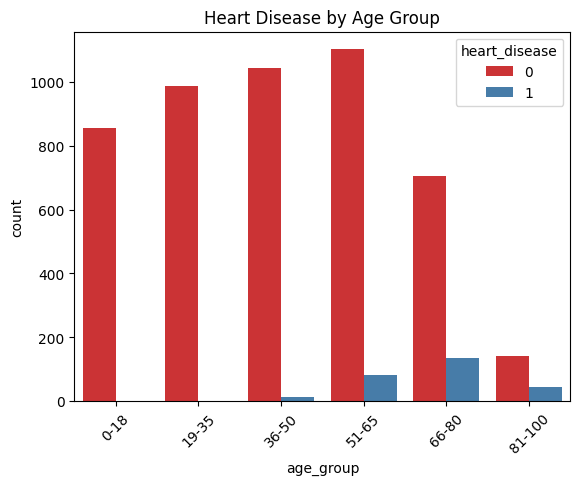

In [49]:
sns.countplot(x='age_group', hue='heart_disease', data=df_viz, palette='Set1')
plt.title('Heart Disease by Age Group')
plt.xticks(rotation=45)
plt.show()

## **29. What is the distribution of work types across different age groups?**

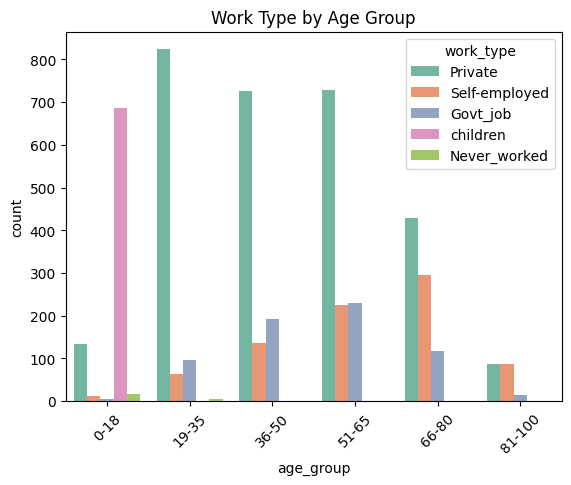

In [50]:
sns.countplot(x='age_group', hue='work_type', data=df_viz, palette='Set2')
plt.title('Work Type by Age Group')
plt.xticks(rotation=45)
plt.show()

## **30. How does smoking status vary across different age groups?**

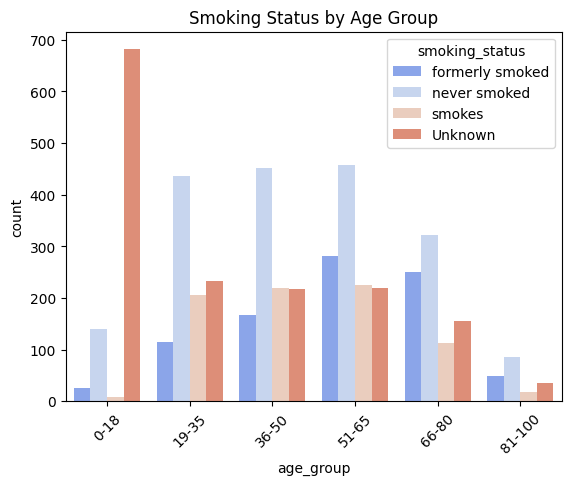

In [51]:
sns.countplot(x='age_group', hue='smoking_status', data=df_viz, palette='coolwarm')
plt.title('Smoking Status by Age Group')
plt.xticks(rotation=45)
plt.show()

# **Random Forests Model**

In [52]:
df_model = df_Fill_Null.copy()

## **Import the Model's Libraries**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [55]:
X = df_model.drop(['id', 'stroke'], axis=1)
y = df_model['stroke']

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()
X[numerical_cols] = numerical_transformer.fit_transform(X[numerical_cols])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
X_categorical = categorical_transformer.fit_transform(X[categorical_cols]).toarray()
X_categorical_df = pd.DataFrame(X_categorical, columns=categorical_transformer.get_feature_names_out(categorical_cols))

X_preprocessed = pd.concat([X[numerical_cols].reset_index(drop=True), X_categorical_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9419439008480104


### **Accuracy Score is 94.1% so the model is Good for Predicting the Stroke!!**

In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533



### **Precision and recall and f1-score is very low in case of predicting the state 1**
### **So the Random Forests Model is poor in Prediction the state of 1 ( the state of the Person will have Stroke in Future )**
### **Thats because the number of records of this state is very lower than the other state**

## **.**
## **.**

# **Thank you for exploring this analysis on stroke prediction & visualization.**

## *I hope these insights and visualizations contribute to your understanding and research.*